# Compare Buenrostro ATAC-seq data with ATAC-STARR-seq accessibility data

## Introduction

With ATAC-STARR-seq, we can extract accessibility peaks processing the data in a similar fashion to ATAC-seq. Given that the original ATAC-seq paper (henceforth referred to as Buenrostro) used GM12878 cells, we want to compare our data to their gold-standard dataset.

Below I perform a host of analyses comparing the two peaksets. Both peaksets were generated using my processing pipeline and called with genrich at a q value of 0.0001. In other words, the only difference between the peaksets are the fastq files that were generated for the experiments. 

In [ ]:
source deactivate
ml Anaconda3
source activate /home/hansetj1/.conda/envs/jupyter
cd /data/hodges_lab/ATAC-STARR_B-cells/bin/activity_analysis/call_active_peaks


## Compare number and overlap

In [1]:
BUEN_DIR='/data/hodges_lab/public_data/GM12878/obtained_as_raw_files/ATAC_GM12878_2013-buenrostro/data/genrich_peaks'
AS_DIR='/data/hodges_lab/ATAC-STARR_B-cells/data/ATAC-STARR/ChrAcc_peaks'

In [2]:
# how many of each?
wc -l ${AS_DIR}/GM12878inGM12878_DNA_genrich_3-replicates_0.0001-qvalue.narrowPeak
wc -l ${BUEN_DIR}/GM12878_ATAC-seq_buenrostro_genrich_0.0001-qvalue.narrowPeak

101904 /data/hodges_lab/ATAC-STARR_B-cells/data/ATAC-STARR/ChrAcc_peaks/GM12878inGM12878_DNA_genrich_3-replicates_0.0001-qvalue.narrowPeak
82337 /data/hodges_lab/public_data/GM12878/obtained_as_raw_files/ATAC_GM12878_2013-buenrostro/data/genrich_peaks/GM12878_ATAC-seq_buenrostro_genrich_0.0001-qvalue.narrowPeak


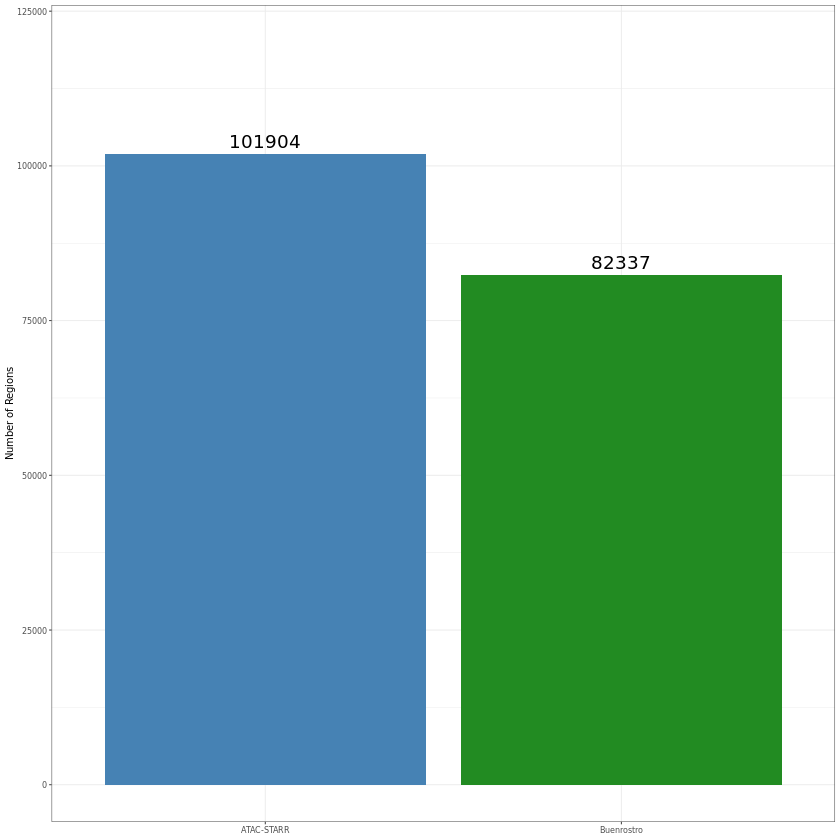

In [14]:
# make a simple barchart:
library(ggplot2)

df <- data.frame(Group = c("ATAC-STARR","Buenrostro"),
  value = c(101904, 82337))

bar <- ggplot(df, aes(x=Group, y=value, fill = Group)) +
  geom_col() +
  geom_text(aes(label = value), vjust = -0.5) +
  theme_bw(base_family = "Arial", base_size = 6) + 
  ylab("Number of Regions") +
  scale_fill_manual(values = c("steelblue", "forestgreen")) +
  theme(legend.position = "none", axis.title.x = element_blank()) +
  coord_cartesian(ylim = c(0, 120000))

bar

In [15]:
#Save bar plot
res <- '/data/hodges_lab/ATAC-STARR_B-cells/results/NAR_paper_figures'
ggsave(bar, filename = paste0(res, "/accessibility_peak-count.pdf"), device = cairo_pdf, width = 3, height = 3)

In [2]:
BUEN_DIR='/data/hodges_lab/public_data/GM12878/obtained_as_raw_files/ATAC_GM12878_2013-buenrostro/data/genrich_peaks'
AS_DIR='/data/hodges_lab/ATAC-STARR_B-cells/data/ATAC-STARR/ChrAcc_peaks'

#quick check to compare ours and buenrostro:
bedtools jaccard -a ${AS_DIR}/GM12878inGM12878_DNA_genrich_3-replicates_0.0001-qvalue.narrowPeak \
    -b ${BUEN_DIR}/GM12878_ATAC-seq_buenrostro_genrich_0.0001-qvalue.narrowPeak

intersection	union	jaccard	n_intersections
38454012	80486872	0.477767	62443


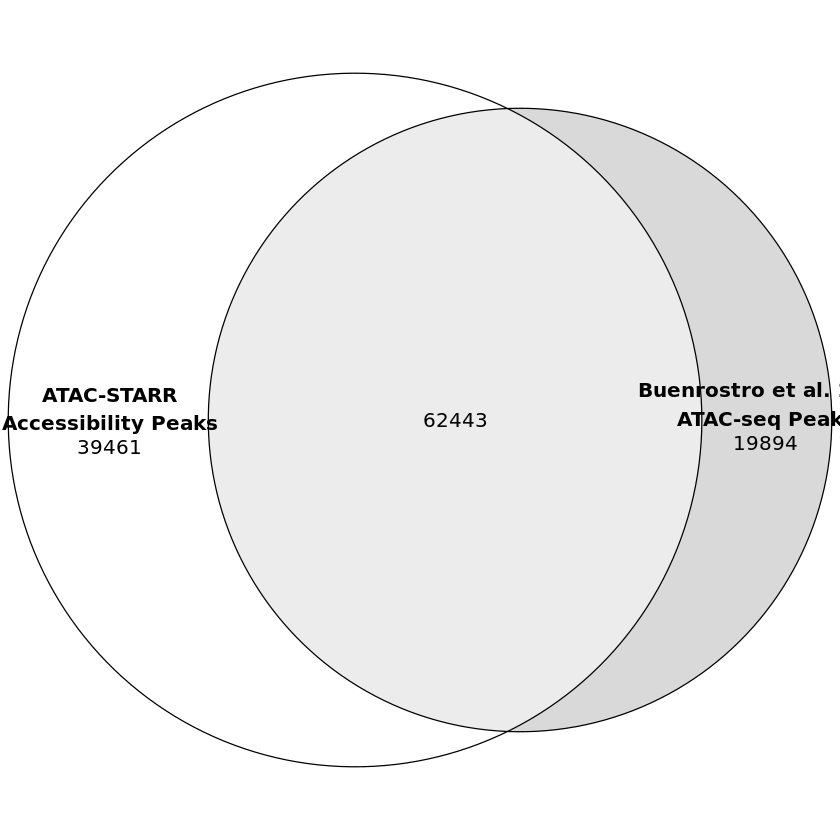

In [1]:
library(eulerr)

#Make a vector of the values above:
combo <- c(`ATAC-STARR\nAccessibility Peaks` = 101904-62443, `Buenrostro et al. 2013\nATAC-seq Peaks` = 82337-62443, 
           "ATAC-STARR\nAccessibility Peaks&Buenrostro et al. 2013\nATAC-seq Peaks" = 62443)
eul <- plot(euler(combo), quantities = TRUE) 
eul

In [3]:
#Save euler plot
res <- '/data/hodges_lab/ATAC-STARR_B-cells/results/NAR_paper_figures'
ggplot2::ggsave(eul, filename = paste0(res, "/accessibility_euler-plot.pdf"), device = cairo_pdf, width = 5, height = 3)

## Genome coverage

while peak count could be different their sizes may not. Therefore, we should ask what percent of the genome is covered by the two peaksets. 

In [17]:
library(tidyverse)

BUEN_DIR <- '/data/hodges_lab/public_data/GM12878/obtained_as_raw_files/ATAC_GM12878_2013-buenrostro/data/genrich_peaks'
AS_DIR <- '/data/hodges_lab/ATAC-STARR_B-cells/data/ATAC-STARR/ChrAcc_peaks'

AS <- read_tsv(paste0(AS_DIR, "/GM12878inGM12878_DNA_genrich_3-replicates_0.0001-qvalue.narrowPeak"), 
              col_names = c("chr", "start", "end", "name", "score", "strand", "signalValue", "pvalue", "qvalue", "peak")) %>% 
    mutate(size = end-start)

BUEN <- read_tsv(paste0(BUEN_DIR, "/GM12878_ATAC-seq_buenrostro_genrich_0.0001-qvalue.narrowPeak"), 
              col_names = c("chr", "start", "end", "name", "score", "strand", "signalValue", "pvalue", "qvalue", "peak")) %>% 
    mutate(size = end-start)

#determine percentage of genome by dividing sum of bps by genome size ~3e9. 
sum(AS$size)/3e9
sum(BUEN$size)/3e9

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ tibble  3.1.3     ✔ dplyr   1.0.7
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1
✔ purrr   0.3.4     

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


── Column specification ────────────────────────────────────────────────────────
cols(
  chr = col_character(),
  start = col_double(),
  end = col_double(),
  name = col_character(),
  score = col_double(),
  strand = col_character(),
  signalValue = col_double(),
  pvalue = col_double(),
  qvalue = col_double(),
  peak = col_double()
)



── Column specification ────────────────────────────────────────────────────────
cols(
  chr = col_character(),
  start = col_double(),
  end = col_double(),
  name = col_character(),
  score = col_double(),
  strand = col_character(),
  signalValue = col_double(),
  pvalue = col_doub

[1] 0.02221054

[1] 0.01743642

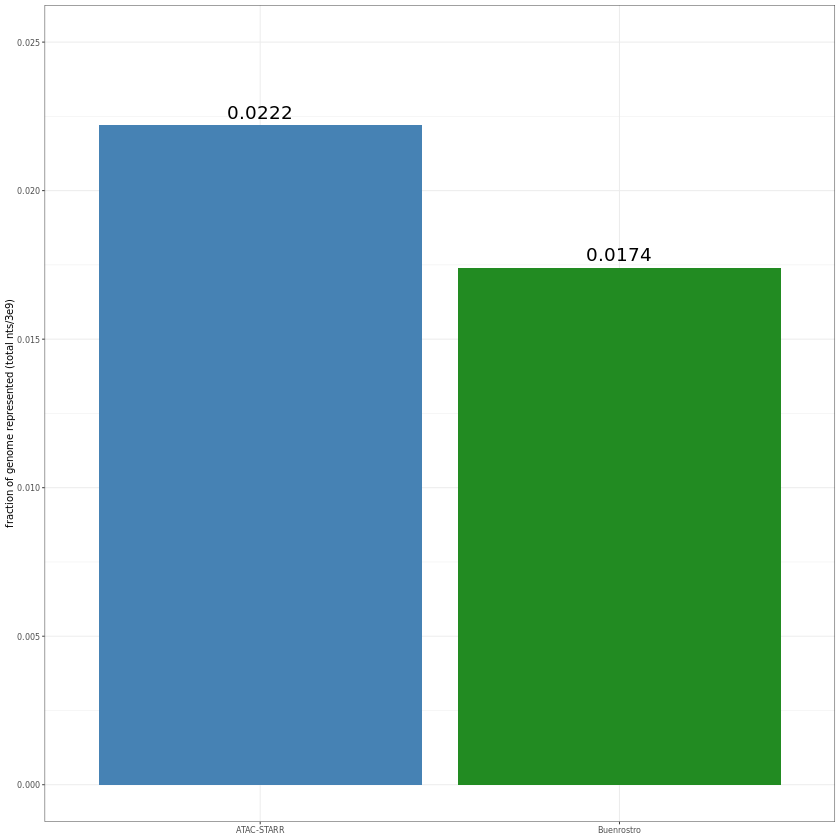

In [22]:
#make barchart of genome coverage
library(ggplot2)

df <- data.frame(Group = c("ATAC-STARR","Buenrostro"),
  value = c(0.0222, 0.0174))

bar <- ggplot(df, aes(x=Group, y=value, fill = Group)) +
  geom_col() +
  geom_text(aes(label = value), vjust = -0.5) +
  theme_bw(base_family = "Arial", base_size = 6) + 
  ylab("fraction of genome represented (total nts/3e9)") +
  scale_fill_manual(values = c("steelblue", "forestgreen")) +
  theme(legend.position = "none", axis.title.x = element_blank()) +
  coord_cartesian(ylim = c(0, 0.025))

bar

In [23]:
#Save euler plot
res <- '/data/hodges_lab/ATAC-STARR_B-cells/results/NAR_paper_figures'
ggsave(bar, filename = paste0(res, "/accessibility_genomic-coverage.pdf"), device = cairo_pdf, width = 3, height = 3)

## Fraction of reads in peaks (FRiP score)

In [1]:
#Buenrostro
BAM='/data/hodges_lab/public_data/GM12878/obtained_as_raw_files/ATAC_GM12878_2013-buenrostro/data/bams/pos-sorted/GM12878_ATAC-seq_buenrostro_merged.unique.pos-sorted.bam'
PEAK='/data/hodges_lab/public_data/GM12878/obtained_as_raw_files/ATAC_GM12878_2013-buenrostro/data/genrich_peaks/GM12878_ATAC-seq_buenrostro_genrich_0.0001-qvalue.narrowPeak'

echo "Buenrostro ATAC-seq" 
echo "Reads in Peaks" 
samtools view -L $PEAK $BAM | wc -l
echo "Total Reads" 
samtools view $BAM | wc -l

Buenrostro ATAC-seq
Reads in Peaks
26736172
Total Reads
129433258


In [3]:
BAM='/data/hodges_lab/ATAC-STARR_B-cells/data/ATAC-STARR/bams/merged_replicates/GM12878inGM12878_DNA_merged-3reps.unique.n-sorted.bam'
PEAK='/data/hodges_lab/ATAC-STARR_B-cells/data/ATAC-STARR/ChrAcc_peaks/GM12878inGM12878_DNA_genrich_3-replicates_0.0001-qvalue.narrowPeak'

echo "GM12878 ATAC-STARR" 
echo "Reads in Peaks" 
samtools view -L $PEAK $BAM | wc -l
echo "Total Reads" 
samtools view $BAM | wc -l 

GM12878 ATAC-STARR
Reads in Peaks
104684749
Total Reads
142021965


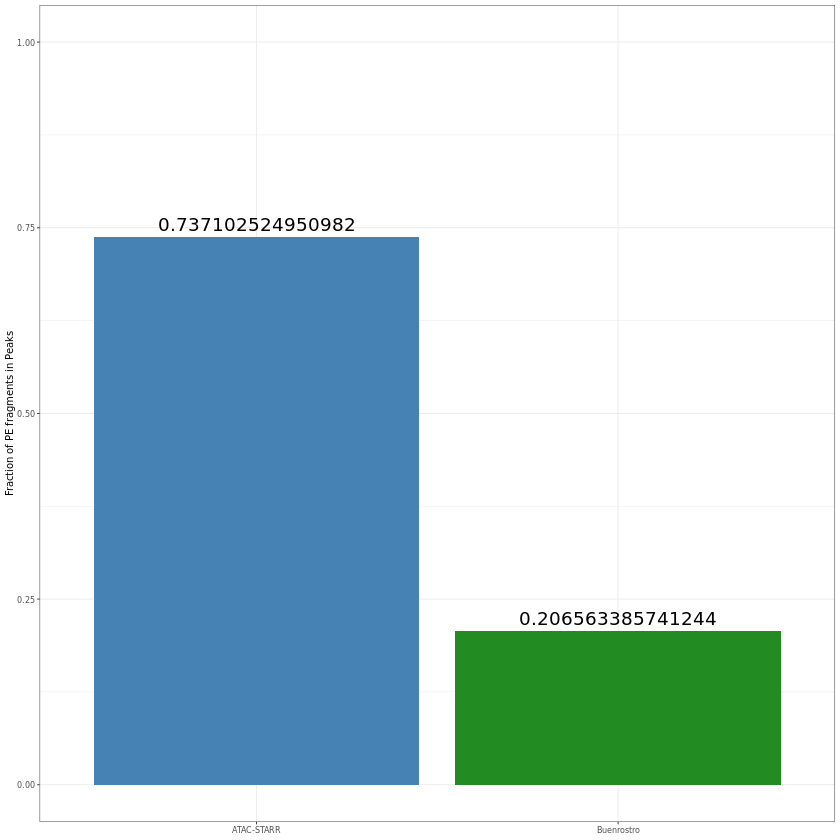

In [6]:
#plot
library(tidyverse)

results <- data.frame(frip = c(104684749,26736172), total = c(142021965,129433258), sample = c("ATAC-STARR", "Buenrostro")) %>% 
    mutate(frip_perc = frip/total)

frip <- ggplot(results, aes(x=sample, y=frip_perc, fill = sample)) +
  geom_col() +
  geom_text(aes(label = frip_perc), vjust = -0.5) +
  scale_fill_manual(values = c("steelblue", "forestgreen")) +
  coord_cartesian(ylim=c(0,1)) +
  ylab("Fraction of PE fragments in Peaks") +
  theme_bw(base_size = 6, base_family = "Arial") +
  theme(legend.position = "none",  
        axis.title.x = element_blank())
frip

In [7]:
#Save euler plot
res <- '/data/hodges_lab/ATAC-STARR_B-cells/results/NAR_paper_figures'
ggsave(frip, filename = paste0(res, "/accessibility_frip.pdf"), device = cairo_pdf, width = 3, height = 3)

## Correlation of accessibility read counts between datasets

### Merged peaks

In [5]:
BUEN_DIR='/data/hodges_lab/public_data/GM12878/obtained_as_raw_files/ATAC_GM12878_2013-buenrostro/data/genrich_peaks'
AS_DIR='/data/hodges_lab/ATAC-STARR_B-cells/data/ATAC-STARR/ChrAcc_peaks'
RES_DIR='/data/hodges_lab/ATAC-STARR_B-cells/results/buenrostro-AS_accessibility-correlation'

#Concatenate peak files and merge. This will be the regions used in the correlation plots.
cat ${AS_DIR}/GM12878inGM12878_DNA_genrich_3-replicates_0.0001-qvalue.narrowPeak \
    ${BUEN_DIR}/GM12878_ATAC-seq_buenrostro_genrich_0.0001-qvalue.narrowPeak | sort -k1,1 -k2,2n | \
    bedtools merge -i - > ${RES_DIR}/ATAC-STARR_and_Buenrostro_merged-peaks.bed

In [8]:
DIR='/data/hodges_lab/ATAC-STARR_B-cells/data/ATAC-STARR/bams/merged_replicates'

#pos-sort and index merged file
samtools sort -@ 4 ${DIR}/GM12878inGM12878_DNA_merged-3reps.unique.n-sorted.bam > ${DIR}/GM12878inGM12878_DNA_merged-3reps.unique.pos-sorted.bam
samtools index -@ 4 ${DIR}/GM12878inGM12878_DNA_merged-3reps.unique.pos-sorted.bam ${DIR}/GM12878inGM12878_DNA_merged-3reps.unique.pos-sorted.bam.bai

[bam_sort_core] merging from 60 files and 4 in-memory blocks...


In [1]:
BUEN_BAM='/data/hodges_lab/public_data/GM12878/obtained_as_raw_files/ATAC_GM12878_2013-buenrostro/data/bams/pos-sorted/GM12878_ATAC-seq_buenrostro_merged.unique.pos-sorted.bam'
AS_BAM='/data/hodges_lab/ATAC-STARR_B-cells/data/ATAC-STARR/bams/merged_replicates/GM12878inGM12878_DNA_merged-3reps.unique.pos-sorted.bam'
RES_DIR='/data/hodges_lab/ATAC-STARR_B-cells/results/buenrostro-AS_accessibility-correlation'

#Only on merged bams. Could do indivudual reps if needed later. 
multiBamSummary BED-file --BED ${RES_DIR}/ATAC-STARR_and_Buenrostro_merged-peaks.bed --bamfiles $AS_BAM $BUEN_BAM \
    -o ${RES_DIR}/ATAC-STARR+Buenrostro_reproducibility_merged-bams.npz \
    -l ATAC-STARR Buenrostro -p 4 -e --outRawCounts ${RES_DIR}/ATAC-STARR+Buenrostro_reproducibility_merged-bams.tsv 

Number of bins found: 121798


In [3]:
#plot using deeptools function
RES_DIR='/data/hodges_lab/ATAC-STARR_B-cells/results/buenrostro-AS_accessibility-correlation'

plotCorrelation -in ${RES_DIR}/ATAC-STARR+Buenrostro_reproducibility_merged-bams.npz -c pearson --skipZeros -p scatterplot \
    -o ${RES_DIR}/ATAC-STARR+Buenrostro_reproducibility_merged-bams_scatterplot_pearson.pdf --log1p

plotCorrelation -in ${RES_DIR}/ATAC-STARR+Buenrostro_reproducibility_merged-bams.npz -c spearman --skipZeros -p scatterplot \
    -o ${RES_DIR}/ATAC-STARR+Buenrostro_reproducibility_merged-bams_scatterplot_spearman.pdf --log1p 


Outliers were detected in the data. Consider using the --removeOutliers parameter to avoid a bias in the pearson correlation.


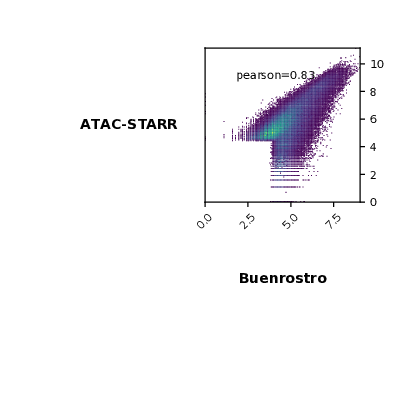

In [10]:
from wand.image import Image as WImage
img = WImage(filename='/data/hodges_lab/ATAC-STARR_B-cells/results/buenrostro-AS_accessibility-correlation/ATAC-STARR+Buenrostro_reproducibility_merged-bams_scatterplot_pearson.pdf', resolution=100) # bigger
img

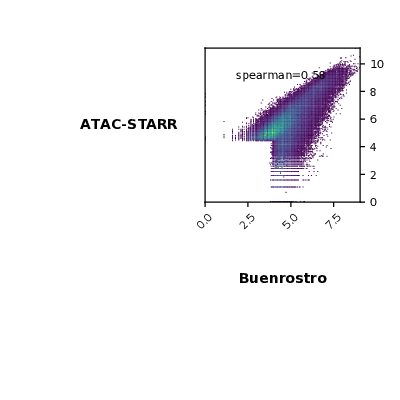

In [11]:
img2 = WImage(filename='/data/hodges_lab/ATAC-STARR_B-cells/results/buenrostro-AS_accessibility-correlation/ATAC-STARR+Buenrostro_reproducibility_merged-bams_scatterplot_spearman.pdf', resolution=100) # bigger
img2

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.3     ✔ dplyr   1.0.7
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


── Column specification ────────────────────────────────────────────────────────
cols(
  Chr = col_character(),
  Start = col_double(),
  End = col_double(),
  `ATAC-STARR` = col_double(),
  Buenrostro = col_double()
)




[1] TRUE

[1] TRUE

Warning message:
“Removed 215 rows containing non-finite values (stat_bin2d).”


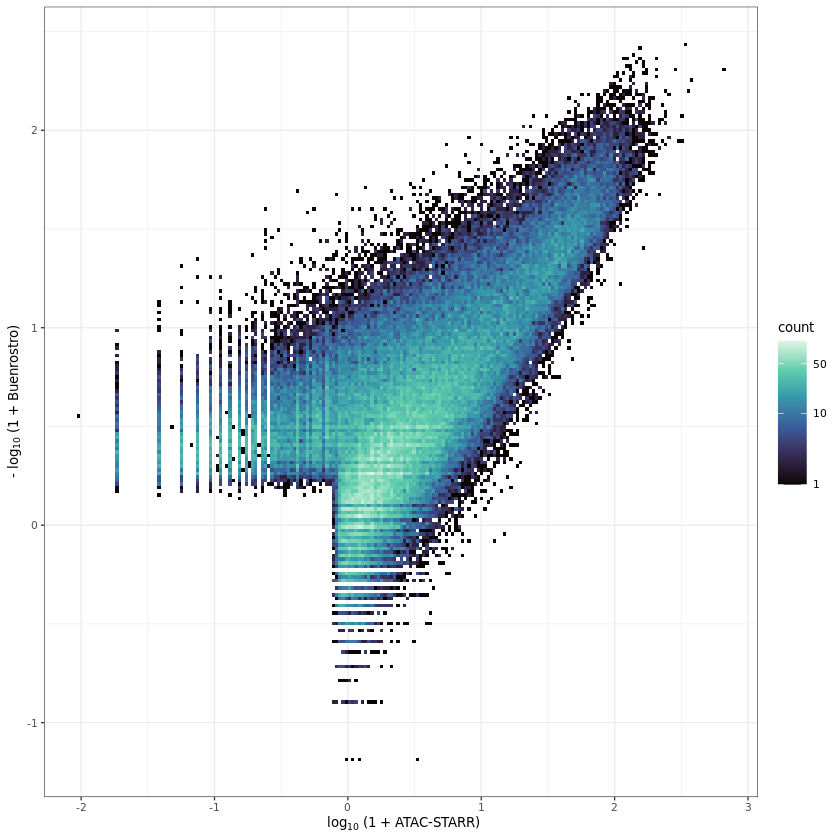

In [1]:
#Plot correlation
library(tidyverse)
res_dir <- '/data/hodges_lab/ATAC-STARR_B-cells/results/buenrostro-AS_accessibility-correlation'

#read in results.
tsv <- read_tsv(file = paste0(res_dir,"/ATAC-STARR+Buenrostro_reproducibility_merged-bams.tsv"), col_names = c("Chr", "Start", "End", "ATAC-STARR", "Buenrostro"), skip = 1)

#calculate scaling factors:
AS_scale <- sum(tsv$`ATAC-STARR`) / 1e6
buen_scale <- sum(tsv$Buenrostro) / 1e6

#scale read counts by million counts. (cpm)
tsv <- mutate(tsv, AS_cpm = `ATAC-STARR` / AS_scale) %>% mutate(buen_cpm = Buenrostro / buen_scale)

#double check scaling, the sum of each cpm column should be 1e6:
sum(tsv$AS_cpm) == 1e6
sum(tsv$buen_cpm) == 1e6

#log10 convert
tsv <- mutate(tsv, AS_log = log10(AS_cpm)) %>% mutate(buen_log = log10(buen_cpm))

#plot scatter:
p <- ggplot(tsv, aes(x=AS_log, y=buen_log)) +
  geom_bin2d(bins=200) +
  #geom_abline(slope = 1, intercept = 0, linetype = "dashed") +
  labs(x = bquote(~log[10]~"(1 + ATAC-STARR)"), y=bquote("-"~log[10]~"(1 + Buenrostro)")) +
  scale_fill_viridis_c(option = "mako",trans = "log", breaks = c(1,10,50)) +
  #scale_y_continuous(breaks = seq(0, 2.5, 0.5)) +
  #scale_x_continuous(breaks = seq(0, 2.5, 0.5)) +
  theme_bw(base_size = 8, base_family = "Arial") +
  theme() #+
  #coord_cartesian(xlim = c(0,2.5), ylim = c(0,2.5))
p

In [ ]:
#Save plot
res <- '/data/hodges_lab/ATAC-STARR_B-cells/results/NAR_paper_figures'
ggsave(p, filename = paste0(res, "/accessibilty_correlation_scatter.pdf", device = cairo_pdf, width = 3, height = 3)

In [7]:
#calculate correlation
cor.test(tsv$AS_cpm, tsv$buen_cpm, method = "spearman")
cor.test(tsv$AS_cpm, tsv$buen_cpm, method = "pearson")

Warning message in cor.test.default(tsv$AS_cpm, tsv$buen_cpm, method = "spearman"):
“Cannot compute exact p-value with ties”



	Spearman's rank correlation rho

data:  tsv$AS_cpm and tsv$buen_cpm
S = 1.2583e+14, p-value < 2.2e-16
alternative hypothesis: true rho is not equal to 0
sample estimates:
      rho 
0.5821579 



	Pearson's product-moment correlation

data:  tsv$AS_cpm and tsv$buen_cpm
t = 514.09, df = 121796, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.8255887 0.8291320
sample estimates:
      cor 
0.8273686 


### Only shared peaks

In [1]:
BUEN_DIR='/data/hodges_lab/public_data/GM12878/obtained_as_raw_files/ATAC_GM12878_2013-buenrostro/data/genrich_peaks'
AS_DIR='/data/hodges_lab/ATAC-STARR_B-cells/data/ATAC-STARR/ChrAcc_peaks'
RES_DIR='/data/hodges_lab/ATAC-STARR_B-cells/results/buenrostro-AS_accessibility-correlation'

#Concatenate peak files and merge. This will be the regions used in the correlation plots.
bedtools intersect -a ${AS_DIR}/GM12878inGM12878_DNA_genrich_3-replicates_0.0001-qvalue.narrowPeak \
    -b ${BUEN_DIR}/GM12878_ATAC-seq_buenrostro_genrich_0.0001-qvalue.narrowPeak | \
    sort -k1,1 -k2,2n > ${RES_DIR}/ATAC-STARR_and_Buenrostro_shared-peaks.bed

In [2]:
BUEN_BAM='/data/hodges_lab/public_data/GM12878/obtained_as_raw_files/ATAC_GM12878_2013-buenrostro/data/bams/pos-sorted/GM12878_ATAC-seq_buenrostro_merged.unique.pos-sorted.bam'
AS_BAM='/data/hodges_lab/ATAC-STARR_B-cells/data/ATAC-STARR/bams/merged_replicates/GM12878inGM12878_DNA_merged-3reps.unique.pos-sorted.bam'
RES_DIR='/data/hodges_lab/ATAC-STARR_B-cells/results/buenrostro-AS_accessibility-correlation'

#Only on merged bams. Could do indivudual reps if needed later. 
multiBamSummary BED-file --BED ${RES_DIR}/ATAC-STARR_and_Buenrostro_shared-peaks.bed --bamfiles $AS_BAM $BUEN_BAM \
    -o ${RES_DIR}/ATAC-STARR+Buenrostro_reproducibility_shared.npz \
    -l ATAC-STARR Buenrostro -p 4 -e --outRawCounts ${RES_DIR}/ATAC-STARR+Buenrostro_reproducibility_shared.tsv 

Number of bins found: 62443



── Column specification ────────────────────────────────────────────────────────
cols(
  Chr = col_character(),
  Start = col_double(),
  End = col_double(),
  `ATAC-STARR` = col_double(),
  Buenrostro = col_double()
)




[1] 1e+06

[1] 1e+06

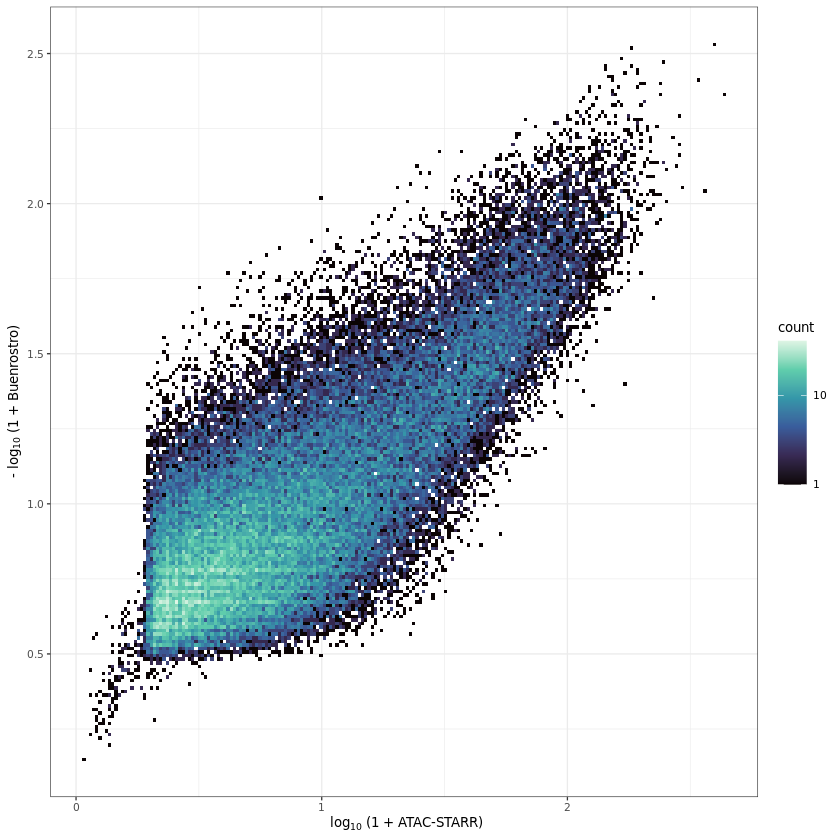

In [13]:
#Plot correlation
library(tidyverse)
res_dir <- '/data/hodges_lab/ATAC-STARR_B-cells/results/buenrostro-AS_accessibility-correlation'

#read in results.
tsv <- read_tsv(file = paste0(res_dir,"/ATAC-STARR+Buenrostro_reproducibility_shared.tsv"), col_names = c("Chr", "Start", "End", "ATAC-STARR", "Buenrostro"), skip = 1)

#calculate scaling factors:
AS_scale <- sum(tsv$`ATAC-STARR`) / 1e6
buen_scale <- sum(tsv$Buenrostro) / 1e6

#scale read counts by million counts. (cpm)
tsv <- mutate(tsv, AS_cpm = `ATAC-STARR` / AS_scale) %>% mutate(buen_cpm = Buenrostro / buen_scale)

#double check scaling, the sum of each cpm column should be 1e6:
sum(tsv$AS_cpm)
sum(tsv$buen_cpm)

#log10 convert
tsv <- mutate(tsv, AS_log = log10(1 + AS_cpm)) %>% mutate(buen_log = log10(1 + buen_cpm))

#plot scatter:
p <- ggplot(tsv, aes(x=AS_log, y=buen_log)) +
  geom_bin2d(bins=200) +
  #geom_abline(slope = 1, intercept = 0, linetype = "dashed") +
  labs(x = bquote(~log[10]~"(1 + ATAC-STARR)"), y=bquote("-"~log[10]~"(1 + Buenrostro)")) +
  scale_fill_viridis_c(option = "mako",trans = "log", breaks = c(1,10,50)) +
  #scale_y_continuous(breaks = seq(0, 2.5, 0.5)) +
  #scale_x_continuous(breaks = seq(0, 2.5, 0.5)) +
  theme_bw(base_size = 8, base_family = "Arial") +
  theme() #+
  #coord_cartesian(xlim = c(0,2.5), ylim = c(0,2.5))
p

In [ ]:
#Save plot
res <- '/data/hodges_lab/ATAC-STARR_B-cells/results/NAR_paper_figures'
ggsave(p, filename = paste0(res, "/accessibilty_correlation_scatter.pdf", device = cairo_pdf, width = 3, height = 3)

In [2]:
#calculate correlation
cor.test(tsv$AS_cpm, tsv$buen_cpm, method = "spearman")
cor.test(tsv$AS_cpm, tsv$buen_cpm, method = "pearson")

Warning message in cor.test.default(tsv$AS_cpm, tsv$buen_cpm, method = "spearman"):
“Cannot compute exact p-value with ties”



	Spearman's rank correlation rho

data:  tsv$AS_cpm and tsv$buen_cpm
S = 1.1429e+13, p-value < 2.2e-16
alternative hypothesis: true rho is not equal to 0
sample estimates:
      rho 
0.7183491 



	Pearson's product-moment correlation

data:  tsv$AS_cpm and tsv$buen_cpm
t = 353.43, df = 62441, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.8138961 0.8191245
sample estimates:
      cor 
0.8165271 


### Turn off center reads

In [1]:
BUEN_BAM='/data/hodges_lab/public_data/GM12878/obtained_as_raw_files/ATAC_GM12878_2013-buenrostro/data/bams/pos-sorted/GM12878_ATAC-seq_buenrostro_merged.unique.pos-sorted.bam'
AS_BAM='/data/hodges_lab/ATAC-STARR_B-cells/data/ATAC-STARR/bams/merged_replicates/GM12878inGM12878_DNA_merged-3reps.unique.pos-sorted.bam'
RES_DIR='/data/hodges_lab/ATAC-STARR_B-cells/results/buenrostro-AS_accessibility-correlation'

#Only on merged bams. Could do indivudual reps if needed later. 
multiBamSummary BED-file --BED ${RES_DIR}/ATAC-STARR_and_Buenrostro_shared-peaks.bed --bamfiles $AS_BAM $BUEN_BAM \
    -o ${RES_DIR}/ATAC-STARR+Buenrostro_reproducibility_shared_no-center.npz \
    -l ATAC-STARR Buenrostro -p 4 --outRawCounts ${RES_DIR}/ATAC-STARR+Buenrostro_reproducibility_shared_no-center.tsv 

Number of bins found: 62443



── Column specification ────────────────────────────────────────────────────────
cols(
  Chr = col_character(),
  Start = col_double(),
  End = col_double(),
  `ATAC-STARR` = col_double(),
  Buenrostro = col_double()
)




[1] 1e+06

[1] 1e+06

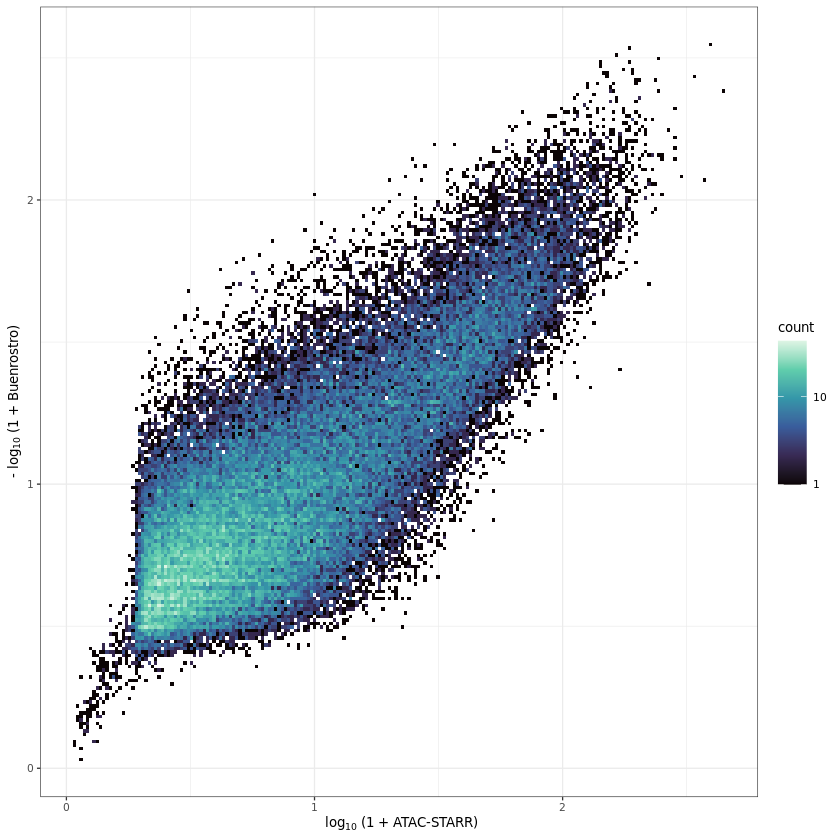

In [10]:
#Plot correlation
library(tidyverse)
res_dir <- '/data/hodges_lab/ATAC-STARR_B-cells/results/buenrostro-AS_accessibility-correlation'

#read in results.
tsv <- read_tsv(file = paste0(res_dir,"/ATAC-STARR+Buenrostro_reproducibility_shared_no-center.tsv"), col_names = c("Chr", "Start", "End", "ATAC-STARR", "Buenrostro"), skip = 1)

#calculate scaling factors:
AS_scale <- sum(tsv$`ATAC-STARR`) / 1e6
buen_scale <- sum(tsv$Buenrostro) / 1e6

#scale read counts by million counts. (cpm)
tsv <- mutate(tsv, AS_cpm = `ATAC-STARR` / AS_scale) %>% mutate(buen_cpm = Buenrostro / buen_scale)

#double check scaling, the sum of each cpm column should be 1e6:
sum(tsv$AS_cpm)
sum(tsv$buen_cpm)

#log10 convert
tsv <- mutate(tsv, AS_log = log10(1+AS_cpm)) %>% mutate(buen_log = log10(1+buen_cpm))

#plot scatter:
p <- ggplot(tsv, aes(x=AS_log, y=buen_log)) +
  geom_bin2d(bins=200) +
  #geom_abline(slope = 1, intercept = 0, linetype = "dashed") +
  labs(x = bquote(~log[10]~"(1 + ATAC-STARR)"), y=bquote("-"~log[10]~"(1 + Buenrostro)")) +
  scale_fill_viridis_c(option = "mako",trans = "log", breaks = c(1,10,50)) +
  #scale_y_continuous(breaks = seq(0, 2.5, 0.5)) +
  #scale_x_continuous(breaks = seq(0, 2.5, 0.5)) +
  theme_bw(base_size = 8, base_family = "Arial") +
  theme() #+
  #coord_cartesian(xlim = c(0,2.5), ylim = c(0,2.5))
p

In [ ]:
#Save plot
res <- '/data/hodges_lab/ATAC-STARR_B-cells/results/NAR_paper_figures'
ggsave(p, filename = paste0(res, "/accessibilty_correlation_scatter.pdf", device = cairo_pdf, width = 3, height = 3)

In [2]:
#calculate correlation
cor.test(tsv$AS_cpm, tsv$buen_cpm, method = "spearman")
cor.test(tsv$AS_cpm, tsv$buen_cpm, method = "pearson")

Warning message in cor.test.default(tsv$AS_cpm, tsv$buen_cpm, method = "spearman"):
“Cannot compute exact p-value with ties”



	Spearman's rank correlation rho

data:  tsv$AS_cpm and tsv$buen_cpm
S = 1.0508e+13, p-value < 2.2e-16
alternative hypothesis: true rho is not equal to 0
sample estimates:
     rho 
0.741047 



	Pearson's product-moment correlation

data:  tsv$AS_cpm and tsv$buen_cpm
t = 361.2, df = 62441, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.8198281 0.8249059
sample estimates:
      cor 
0.8223834 


## Compare ATAC-seq signal at GPR132 locus

In [1]:
%%bash 
AS_BAM='/data/hodges_lab/ATAC-STARR_B-cells/data/ATAC-STARR/bams/merged_replicates/GM12878inGM12878_DNA_merged-3reps.unique.pos-sorted.bam'
RES_DIR='/data/hodges_lab/ATAC-STARR_B-cells/results/buenrostro-AS_accessibility-correlation'
BUEN_BAM='/data/hodges_lab/public_data/GM12878/obtained_as_raw_files/ATAC_GM12878_2013-buenrostro/data/bams/pos-sorted/GM12878_ATAC-seq_buenrostro_merged.unique.pos-sorted.bam'

bamCoverage -b $AS_BAM \
    -o ${RES_DIR}/GM12878inGM12878_DNA_3-reps_no-dup_cpm.bw \
    -of bigwig --binSize 10 --normalizeUsing CPM --extendReads -p 12

bamCoverage -b $BUEN_BAM \
    -o ${RES_DIR}/GM12878_ATAC-seq_buenrostro_no-dup_cpm.bw \
    -of bigwig --binSize 10 --normalizeUsing CPM --extendReads -p 12

normalization: CPM
bamFilesList: ['/data/hodges_lab/ATAC-STARR_B-cells/data/ATAC-STARR/bams/merged_replicates/GM12878inGM12878_DNA_merged-3reps.unique.pos-sorted.bam']
binLength: 10
numberOfSamples: None
blackListFileName: None
skipZeroOverZero: False
bed_and_bin: False
genomeChunkSize: None
defaultFragmentLength: 111
numberOfProcessors: 12
verbose: False
region: None
bedFile: None
minMappingQuality: None
ignoreDuplicates: False
chrsToSkip: []
stepSize: 10
center_read: False
samFlag_include: None
samFlag_exclude: None
minFragmentLength: 0
maxFragmentLength: 0
zerosToNans: False
smoothLength: None
save_data: False
out_file_for_raw_data: None
maxPairedFragmentLength: 444
normalization: CPM
bamFilesList: ['/data/hodges_lab/public_data/GM12878/obtained_as_raw_files/ATAC_GM12878_2013-buenrostro/data/bams/pos-sorted/GM12878_ATAC-seq_buenrostro_merged.unique.pos-sorted.bam']
binLength: 10
numberOfSamples: None
blackListFileName: None
skipZeroOverZero: False
bed_and_bin: False
genomeChunkSize:

In [1]:
%%bash 

RES_DIR='/data/hodges_lab/ATAC-STARR_B-cells/results/buenrostro-AS_accessibility-correlation'

#convert to bedgraph
bigWigToBedGraph ${RES_DIR}/GM12878inGM12878_DNA_3-reps_no-dup_cpm.bw ${RES_DIR}/GM12878inGM12878_DNA_3-reps_no-dup_cpm.bedGraph
bigWigToBedGraph ${RES_DIR}/GM12878_ATAC-seq_buenrostro_no-dup_cpm.bw ${RES_DIR}/GM12878_ATAC-seq_buenrostro_no-dup_cpm.bedGraph

In [3]:
library(Sushi)
#cannot use tidyverse, only base R
#signal
AS_ATAC <- read.delim("/data/hodges_lab/ATAC-STARR_B-cells/results/buenrostro-AS_accessibility-correlation/GM12878inGM12878_DNA_3-reps_no-dup_cpm.bedGraph", header = FALSE)
buenrostro <- read.delim("/data/hodges_lab/ATAC-STARR_B-cells/results/buenrostro-AS_accessibility-correlation/GM12878_ATAC-seq_buenrostro_no-dup_cpm.bedGraph", header = FALSE)

#genes
RefSeq_genes <- read.delim("/data/hodges_lab/ATAC-STARR_B-cells/results/buenrostro-AS_accessibility-correlation/hg38.ncbiRefSeq_exons-Sushi-compatible.bed", header = FALSE)

In [4]:
RefSeq_genes_pos <- RefSeq_genes[RefSeq_genes[6] == "+",]
RefSeq_genes_pos[6] <- 1
RefSeq_genes_neg <- RefSeq_genes[RefSeq_genes[6] == "-",]
RefSeq_genes_neg[6] <- -1

genes <- rbind(RefSeq_genes_pos, RefSeq_genes_neg)

summary(genes[6])

       V6           
 Min.   :-1.000000  
 1st Qu.:-1.000000  
 Median :-1.000000  
 Mean   :-0.002127  
 3rd Qu.: 1.000000  
 Max.   : 1.000000  

In [5]:
g <- genes[genes[1] == "chr19",]
a <- AS_ATAC[AS_ATAC[1] == "chr19",]
b <- buenrostro[buenrostro[1] == "chr19",]

head(g)
summary(g[6])

head(a)
head(b)

,V1,V2,V3,V4,V5,V6
,<chr>,<int>,<int>,<chr>,<chr>,<dbl>
253659,chr19,58598956,58599484,RPL23AP79,.,1
253660,chr19,58586267,58586356,LOC107987272,.,1
253661,chr19,58589066,58590946,LOC107987272,.,1
253662,chr19,58575399,58575588,CENPBD1P1,.,1
253663,chr19,58581245,58584395,CENPBD1P1,.,1
253707,chr19,58559186,58559409,MZF1-AS1,.,1


       V6          
 Min.   :-1.00000  
 1st Qu.:-1.00000  
 Median : 1.00000  
 Mean   : 0.00503  
 3rd Qu.: 1.00000  
 Max.   : 1.00000  

,V1,V2,V3,V4
,<chr>,<int>,<int>,<dbl>
12466739,chr19,0,62990,0.0000000
12466740,chr19,62990,63070,0.0140823
12466741,chr19,63070,70970,0.0000000
12466742,chr19,70970,70980,0.0422470
12466743,chr19,70980,70990,0.5210460
12466744,chr19,70990,71000,0.7181990


,V1,V2,V3,V4
,<chr>,<int>,<int>,<dbl>
29397756,chr19,0,61220,0.000000
29397757,chr19,61220,61240,0.015452
29397758,chr19,61240,61310,0.030904
29397759,chr19,61310,61330,0.015452
29397760,chr19,61330,62840,0.000000
29397761,chr19,62840,63050,0.015452


In [6]:
library(Sushi)
chrom = "chr19"
chromstart = 35611232
chromend = 35798446 

dev.off()

pdf("/data/hodges_lab/ATAC-STARR_B-cells/results/NAR_paper_figures/accessibilty_signal_cpm.pdf", width=6, height=3)

layout(matrix(c(1,1,
                2,2,
                2,2,
                3,3,
                3,3), ncol = 2, byrow = TRUE))
par(mar=c(0, 4, 0, 0))

plotGenes(geneinfo = g,chrom,chromstart,chromend, bentline = FALSE, arrowlength = 0.005, col = "black",types = "exon", maxrows=2, bheight=0.15, 
          labeloffset=0.5, fontsize=0.75, labeltext=TRUE)

plotBedgraph(signal = a,chrom,chromstart,chromend,transparency=1,color="steelblue")
axis(side=2,las=2,tcl=.2)
labelgenome(chrom,chromstart,chromend,side=1,n=3,scale="Kb")

plotBedgraph(signal = b, chrom, chromstart, chromend,transparency=1,color="forestgreen")
axis(side=2,las=2,tcl=.2)
labelgenome(chrom,chromstart,chromend,side=1,n=3,scale="Kb")
dev.off()

null device 
          1

[[1]]
NULL

[[2]]
function (n) 
{
    x <- ramp(seq.int(0, 1, length.out = n))
    if (ncol(x) == 4L) 
        rgb(x[, 1L], x[, 2L], x[, 3L], x[, 4L], maxColorValue = 255)
    else rgb(x[, 1L], x[, 2L], x[, 3L], maxColorValue = 255)
}
<bytecode: 0x55cc27d63110>
<environment: 0x55cc27d61f90>

null device 
          1

In [9]:
library(tidyverse)
#check raw counts using the file from part 5
res <- '/data/hodges_lab/ATAC-STARR_B-cells/results/buenrostro-AS_accessibility-correlation'

read_tsv(paste0(res, "/ATAC-STARR+Buenrostro_reproducibility_merged-bams.tsv"), col_names = FALSE, skip = 1) %>% filter(X1 == "chr19", X2 > 35611232) %>% head()


── Column specification ────────────────────────────────────────────────────────
cols(
  X1 = col_character(),
  X2 = col_double(),
  X3 = col_double(),
  X4 = col_double(),
  X5 = col_double()
)




X1,X2,X3,X4,X5
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
chr19,48806587,48806951,314,58
chr19,48810598,48811798,3886,310
chr19,48811963,48812942,3780,337
chr19,48815915,48816282,246,49
chr19,48835589,48836291,2106,183
chr19,48836928,48837555,1920,104


## Motif Enrichment

In [ ]:
BUEN_DIR='/data/hodges_lab/public_data/GM12878/obtained_as_raw_files/ATAC_GM12878_2013-buenrostro/data/genrich_peaks'
AS_DIR='/data/hodges_lab/ATAC-STARR_B-cells/data/ATAC-STARR/ChrAcc_peaks'
RES_DIR='/data/hodges_lab/ATAC-STARR_B-cells/results/chrAcc_peaks_motif-enrichment'

findMotifsGenome.pl ${AS_DIR}/GM12878inGM12878_DNA_genrich_3-replicates_0.0001-qvalue.narrowPeak hg38 \
    ${RES_DIR}/GM12878inGM12878_DNA_genrich_3-replicates_0.0001-qvalue -size given -p 4 -nomotif


	Position file = /data/hodges_lab/ATAC-STARR_B-cells/data/ATAC-STARR/ChrAcc_peaks/GM12878inGM12878_DNA_genrich_3-replicates_0.0001-qvalue.narrowPeak
	Genome = hg38
	Output Directory = /data/hodges_lab/ATAC-STARR_B-cells/results/chrAcc_peaks_motif-enrichment/GM12878inGM12878_DNA_genrich_3-replicates_0.0001-qvalue
	Using actual sizes of regions (-size given)
	Fragment size set to given
	Using 4 CPUs
	Will not run homer for de novo motifs
	Found mset for "human", will check against vertebrates motifs
	Peak/BED file conversion summary:
		BED/Header formatted lines: 101904
		peakfile formatted lines: 0

	Peak File Statistics:
		Total Peaks: 101904
		Redundant Peak IDs: 0
		Peaks lacking information: 0 (need at least 5 columns per peak)
		Peaks with misformatted coordinates: 0 (should be integer)
		Peaks with misformatted strand: 0 (should be either +/- or 0/1)

	Peak file looks good!

	Background fragment size set to 652 (avg size of targets)
	Could not find background files for 652 bp fra

	Extracting 39 sequences from chr8_KI270820v1_alt
	Extracting 109 sequences from chr8_KI270817v1_alt
	Extracting 236 sequences from chr8_KI270816v1_alt
	Extracting 57 sequences from chr8_KI270815v1_alt
	Extracting 36 sequences from chr9_GL383540v1_alt
	Extracting 88 sequences from chr9_GL383541v1_alt
	Extracting 159 sequences from chr9_KI270823v1_alt
	Extracting 74 sequences from chr10_GL383545v1_alt
	Extracting 136 sequences from chr10_GL383546v1_alt
	Extracting 46 sequences from chr10_KI270825v1_alt
	Extracting 151 sequences from chr11_KI270832v1_alt
	Extracting 105 sequences from chr11_KI270830v1_alt
	Extracting 189 sequences from chr11_KI270831v1_alt
	Extracting 129 sequences from chr11_KI270829v1_alt
	Extracting 134 sequences from chr11_JH159136v1_alt
	Extracting 55 sequences from chr11_JH159137v1_alt
	Extracting 34 sequences from chr11_KI270827v1_alt
	Extracting 116 sequences from chr12_GL877875v1_alt
	Extracting 259 sequences from chr12_GL877876v1_alt
	Extracting 35 sequences fr

	Extracting 101 sequences from chrUn_GL000220v1
	Extracting 56 sequences from chrUn_GL000224v1
	Extracting 43 sequences from chrUn_KI270741v1
	Extracting 113 sequences from chrUn_GL000213v1
	Extracting 53 sequences from chrUn_KI270753v1
	Extracting 65 sequences from chrUn_GL000218v1
	Extracting 35018 sequences from chrX
	Extracting 4697 sequences from chrY
		3373 of 824139 removed because they had >70.00% Ns (i.e. masked repeats)

	Sequences processed:
		Auto detected maximum sequence length of 653 bp
		100000
		200000
		300000
		400000
		500000
		600000
		700000
		800000
		820766 total

	Frequency Bins: 0.01 0.02 0.03 0.04 0.05 0.06 0.08 0.1 0.12 0.14 0.16
	Freq	Bin	Count
	0.01	0	436584
	0.02	1	233040
	0.03	2	69215
	0.04	3	30043
	0.05	4	11568
	0.06	5	8670
	0.08	6	12413
	0.1	7	8740
	0.12	8	5708
	0.14	9	3171
	0.16	10	1248
	11	11	366
	Frequency Bins: 0.2 0.25 0.3 0.35 0.4 0.45 0.5 0.6 0.7 0.8
	Freq	Bin	Count
	0.2	0	373
	0.25	1	1286
	0.3	2	23691
	0.35	3	100695
	0.4	4	175663
	0.45	5	186010

		42 of 428 (1e-500) NFkB-p50,p52(RHD)/Monocyte-p50-ChIP-Chip(Schreiber_et_al.)/Homer
		43 of 428 (1e-497) Sp1(Zf)/Promoter/Homer
		44 of 428 (1e-479) RUNX1(Runt)/Jurkat-RUNX1-ChIP-Seq(GSE29180)/Homer
		45 of 428 (1e-436) Egr2(Zf)/Thymocytes-Egr2-ChIP-Seq(GSE34254)/Homer
		46 of 428 (1e-426) EHF(ETS)/LoVo-EHF-ChIP-Seq(GSE49402)/Homer
		47 of 428 (1e-376) RUNX-AML(Runt)/CD4+-PolII-ChIP-Seq(Barski_et_al.)/Homer
		48 of 428 (1e-364) RUNX2(Runt)/PCa-RUNX2-ChIP-Seq(GSE33889)/Homer
		49 of 428 (1e-354) ETS:RUNX(ETS,Runt)/Jurkat-RUNX1-ChIP-Seq(GSE17954)/Homer
		50 of 428 (1e-334) NFkB-p65-Rel(RHD)/ThioMac-LPS-Expression(GSE23622)/Homer
		51 of 428 (1e-333) Bach1(bZIP)/K562-Bach1-ChIP-Seq(GSE31477)/Homer
		52 of 428 (1e-329) NFkB-p65(RHD)/GM12787-p65-ChIP-Seq(GSE19485)/Homer
		53 of 428 (1e-325) PRDM1(Zf)/Hela-PRDM1-ChIP-Seq(GSE31477)/Homer
		54 of 428 (1e-323) NF-E2(bZIP)/K562-NFE2-ChIP-Seq(GSE31477)/Homer
		55 of 428 (1e-309) HINFP(Zf)/K562-HINFP.eGFP-ChIP-Seq(Encode)/Homer
		56 of 428 (1e-2

	Job finished - if results look good, please send beer to ..

	Cleaning up tmp files...


	Position file = /data/hodges_lab/public_data/GM12878/obtained_as_raw_files/ATAC_GM12878_2013-buenrostro/data/genrich_peaks/GM12878_ATAC-seq_buenrostro_genrich_0.0001-qvalue.narrowPeak
	Genome = hg38
	Output Directory = /data/hodges_lab/ATAC-STARR_B-cells/results/chrAcc_peaks_motif-enrichment/GM12878_ATAC-seq_buenrostro_genrich_0.0001-qvalue.narrowPeak
	Using actual sizes of regions (-size given)
	Fragment size set to given
	Using 4 CPUs
	Will not run homer for de novo motifs
	Found mset for "human", will check against vertebrates motifs
	Peak/BED file conversion summary:
		BED/Header formatted lines: 82337
		peakfile formatted lines: 0

	Peak File Statistics:
		Total Peaks: 82337
		Redundant Peak IDs: 0
		Peaks lacking information: 0 (need at least 5 columns per peak)
		Peaks with misformatted coordinates: 0 (should be integer)
		Peaks with misformatted strand: 0 (should be either +/- or 0/1)

	P

In [1]:
BUEN_DIR='/data/hodges_lab/public_data/GM12878/obtained_as_raw_files/ATAC_GM12878_2013-buenrostro/data/genrich_peaks'
AS_DIR='/data/hodges_lab/ATAC-STARR_B-cells/data/ATAC-STARR/ChrAcc_peaks'
RES_DIR='/data/hodges_lab/ATAC-STARR_B-cells/results/chrAcc_peaks_motif-enrichment'

findMotifsGenome.pl ${BUEN_DIR}/GM12878_ATAC-seq_buenrostro_genrich_0.0001-qvalue.narrowPeak hg38 \
    ${RES_DIR}/GM12878_ATAC-seq_buenrostro_genrich_0.0001-qvalue.narrowPeak -size given -p 4 -nomotif


	Position file = /data/hodges_lab/public_data/GM12878/obtained_as_raw_files/ATAC_GM12878_2013-buenrostro/data/genrich_peaks/GM12878_ATAC-seq_buenrostro_genrich_0.0001-qvalue.narrowPeak
	Genome = hg38
	Output Directory = /data/hodges_lab/ATAC-STARR_B-cells/results/chrAcc_peaks_motif-enrichment/GM12878_ATAC-seq_buenrostro_genrich_0.0001-qvalue.narrowPeak
	Using actual sizes of regions (-size given)
	Fragment size set to given
	Using 4 CPUs
	Will not run homer for de novo motifs
	Found mset for "human", will check against vertebrates motifs
	Peak/BED file conversion summary:
		BED/Header formatted lines: 82337
		peakfile formatted lines: 0

	Peak File Statistics:
		Total Peaks: 82337
		Redundant Peak IDs: 0
		Peaks lacking information: 0 (need at least 5 columns per peak)
		Peaks with misformatted coordinates: 0 (should be integer)
		Peaks with misformatted strand: 0 (should be either +/- or 0/1)

	Peak file looks good!

	Background fragment size set to 634 (avg size of targets)
	Backgro

		48 of 428 (1e-307) NRF1(NRF)/MCF7-NRF1-ChIP-Seq(Unpublished)/Homer
		49 of 428 (1e-302) ETS:RUNX(ETS,Runt)/Jurkat-RUNX1-ChIP-Seq(GSE17954)/Homer
		50 of 428 (1e-289) Egr2(Zf)/Thymocytes-Egr2-ChIP-Seq(GSE34254)/Homer
		51 of 428 (1e-277) Bach1(bZIP)/K562-Bach1-ChIP-Seq(GSE31477)/Homer
		52 of 428 (1e-274) HINFP(Zf)/K562-HINFP.eGFP-ChIP-Seq(Encode)/Homer
		53 of 428 (1e-260) NFkB-p50,p52(RHD)/Monocyte-p50-ChIP-Chip(Schreiber_et_al.)/Homer
		54 of 428 (1e-252) NFkB-p65-Rel(RHD)/ThioMac-LPS-Expression(GSE23622)/Homer
		55 of 428 (1e-218) NF-E2(bZIP)/K562-NFE2-ChIP-Seq(GSE31477)/Homer
		56 of 428 (1e-215) E2F4(E2F)/K562-E2F4-ChIP-Seq(GSE31477)/Homer
		57 of 428 (1e-201) Nrf2(bZIP)/Lymphoblast-Nrf2-ChIP-Seq(GSE37589)/Homer
		58 of 428 (1e-172) Zfp57(Zf)/H1-ZFP57.HA-ChIP-Seq(GSE115387)/Homer
		59 of 428 (1e-172) NFE2L2(bZIP)/HepG2-NFE2L2-ChIP-Seq(Encode)/Homer
		60 of 428 (1e-171) NFkB-p65(RHD)/GM12787-p65-ChIP-Seq(GSE19485)/Homer
		61 of 428 (1e-170) Zfp281(Zf)/ES-Zfp281-ChIP-Seq(GSE81042)

		168 of 428 (1e-2) GRE(NR),IR3/A549-GR-ChIP-Seq(GSE32465)/Homer
	Skipping...
	Job finished - if results look good, please send beer to ..

	Cleaning up tmp files...



In [2]:
# plot motif results
library(tidyverse)
library(egg)
library(data.table)
library(ggrepel)

Loading required package: gridExtra


Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine



Attaching package: ‘data.table’


The following objects are masked from ‘package:dplyr’:

    between, first, last


The following object is masked from ‘package:purrr’:

    transpose





── Column specification ────────────────────────────────────────────────────────
cols(
  MotifName = col_character(),
  Consensus = col_character(),
  p = col_double(),
  logp = col_double(),
  q = col_double(),
  numTarget = col_double(),
  percentTarget = col_character(),
  numBackground = col_double(),
  percentBackground = col_character()
)



── Column specification ────────────────────────────────────────────────────────
cols(
  MotifName = col_character(),
  Consensus = col_character(),
  p = col_double(),
  logp = col_double(),
  q = col_double(),
  numTarget = col_double(),
  percentTarget = col_character(),
  numBackground = col_double(),
  percentBackground = col_character()
)


Warning message:
“ggrepel: 402 unlabeled data points (too many overlaps). Consider increasing max.overlaps”


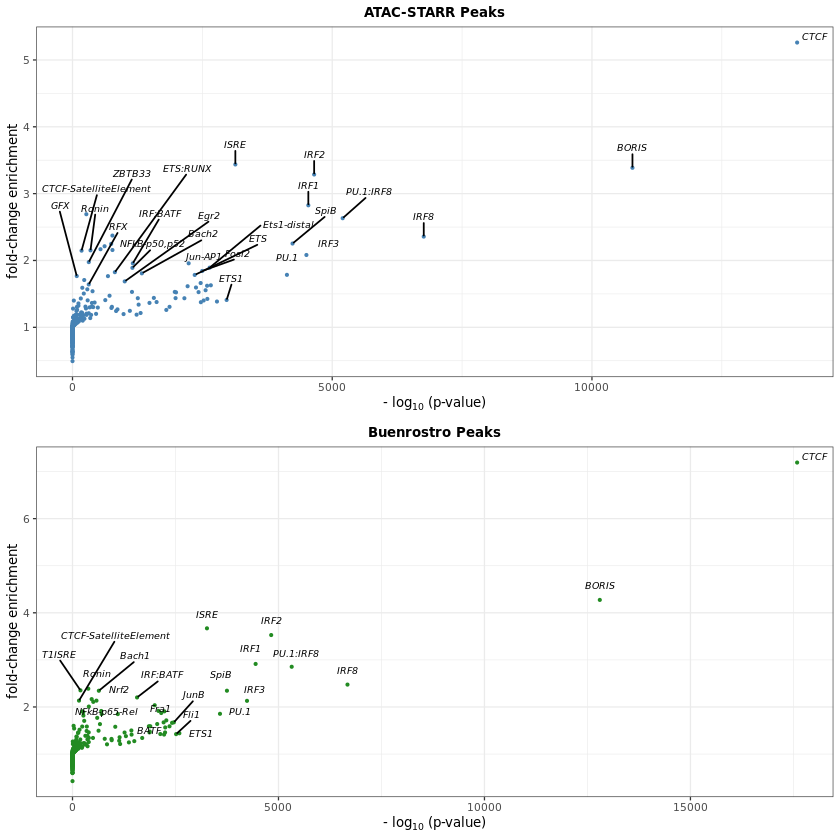

In [6]:
#Read in motif results txt files with this function. 
format_motif_results <- function(df){
  df <- mutate(df, percentTargetNum = (as.numeric(gsub("%", "", percentTarget, fixed = TRUE))/100))
  df <- mutate(df, percentBackgroundNum = (as.numeric(gsub("%", "", percentBackground, fixed = TRUE))/100)) 
  df <- mutate(df, percentFold = (percentTargetNum/percentBackgroundNum))
  df <- mutate(df, Motif = gsub("\\(.*", "", MotifName))
  df$Motif <- factor(df$Motif,levels=rev(unique(df$Motif)))
  # Plot with GGPlot
  return(df)
}

res_dir <- '/data/hodges_lab/ATAC-STARR_B-cells/results/chrAcc_peaks_motif-enrichment'

AS <- read_tsv(paste0(res_dir,"/GM12878inGM12878_DNA_genrich_3-replicates_0.0001-qvalue/knownResults.txt"), 
    col_names=c("MotifName","Consensus","p","logp","q","numTarget", "percentTarget","numBackground","percentBackground"), 
    skip = 1)
    
buen <- read_tsv(paste0(res_dir,"/GM12878_ATAC-seq_buenrostro_genrich_0.0001-qvalue.narrowPeak/knownResults.txt"), 
    col_names=c("MotifName","Consensus","p","logp","q","numTarget", "percentTarget","numBackground","percentBackground"), 
    skip = 1)
    
AS <- format_motif_results(df=AS) 
AS_text <- filter(AS, rank(logp) <= 15 | rank(dplyr::desc(percentFold)) >= 15)

buen <- format_motif_results(df=buen) 
buen_text <- filter(buen, rank((logp)) <= 15 | rank(dplyr::desc(percentFold)) <= 15)

p_AS <- ggplot(AS, aes(x=abs(as.numeric(logp)), y=percentFold)) + 
    geom_point(color="steelblue", size = 0.5) +
    geom_text_repel(data=AS_text, aes(x=abs(as.numeric(logp)), y=percentFold, label = Motif), 
               hjust = 0.5, nudge_y = 0.3, size = 2, fontface = "italic", 
               max.overlaps = getOption("ggrepel.max.overlaps", default = 15)) + 
    ggtitle("ATAC-STARR Peaks") +
    labs(x = bquote("-"~log[10]~"(p-value)"), y = "fold-change enrichment") +
    theme_bw(base_size = 8, base_family = "Arial") +
    theme(plot.title = element_text(hjust = 0.5, size = 8, face = "bold"))

p_buen <- ggplot(buen, aes(x=abs(as.numeric(logp)), y=percentFold)) + 
    geom_point(color="forestgreen", size = 0.5) +
    geom_text_repel(data=buen_text, aes(x=abs(as.numeric(logp)), y=percentFold, label = Motif), 
               hjust = 0.5, nudge_y = 0.3, size = 2, fontface = "italic", 
               max.overlaps = getOption("ggrepel.max.overlaps", default = 15)) + 
    ggtitle("Buenrostro Peaks") +
    labs(x = bquote("-"~log[10]~"(p-value)"), y = "fold-change enrichment") +
    theme_bw(base_size = 8, base_family = "Arial") +
    theme(plot.title = element_text(hjust = 0.5, size =8, face = "bold"))

p <- ggarrange(p_AS, p_buen, nrow = 2)

In [7]:
res <- '/data/hodges_lab/ATAC-STARR_B-cells/results/NAR_paper_figures'
ggsave(p, filename = paste0(res, "/accessibility_motif_enrichment.pdf"), device = cairo_pdf, width = 2.5, height = 4)

Warning message:
“ggrepel: 414 unlabeled data points (too many overlaps). Consider increasing max.overlaps”
Warning message:
“ggrepel: 12 unlabeled data points (too many overlaps). Consider increasing max.overlaps”
